Przygotowanie danych:

In [271]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [272]:
from tensorflow import keras
import numpy as np
scaler = keras.layers.Rescaling(scale=1/max(np.max(X_train), np.max(X_test)))

X_train_scaled = scaler(X_train)
X_test_scaled = scaler(X_test)

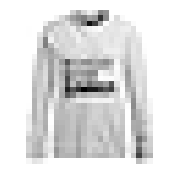

'pulower'

In [273]:
import matplotlib.pyplot as plt
plt.figure(figsize = (2,2))
plt.imshow(X_train[92], cmap="binary")
plt.axis('off')
plt.show()

class_names = ["koszulka", "spodnie", "pulower", "sukienka", "kurtka",
"sandał", "koszula", "półbut", "torba", "but"]
class_names[y_train[92]]

In [274]:
model = keras.models.Sequential()

x = model.add(keras.layers.Input(shape=[28,28]))
flat = model.add(keras.layers.Flatten(x))
dense_1 = model.add(keras.layers.Dense(units=300, activation='relu'))
dense_2 = model.add(keras.layers.Dense(units=100, activation='relu'))
dense_fin = model.add(keras.layers.Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_53"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_33 (Flatten)            │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_124 (Dense)               │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_125 (Dense)               │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_126 (Dense)               │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [275]:
model.compile(optimizer=keras.optimizers.SGD(), loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [276]:
import os
root_logdir = os.path.join(os.curdir, "image_logs")

def get_run_logdir(root_logdir: str):
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir(root_logdir)

In [277]:
tensorboard_cb = keras.callbacks.TensorBoard(log_dir=run_logdir)

model.fit(x=X_train_scaled, y=y_train, epochs=20, validation_split=0.1, callbacks=tensorboard_cb)

Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6764 - loss: 0.9937 - val_accuracy: 0.8205 - val_loss: 0.5321
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8222 - loss: 0.5119 - val_accuracy: 0.8367 - val_loss: 0.4741
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8453 - loss: 0.4440 - val_accuracy: 0.8423 - val_loss: 0.4339
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8538 - loss: 0.4218 - val_accuracy: 0.8367 - val_loss: 0.4548
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8578 - loss: 0.4037 - val_accuracy: 0.8457 - val_loss: 0.4212
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8650 - loss: 0.3807 - val_accuracy: 0.8477 - val_loss: 0.4142
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8690 - loss: 0.3737 - val_accuracy: 0.8672 - val_loss: 0.3750
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8736 - loss: 0.3577 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Prediction: kurtka
Confidence: 1.0
Truth: koszula


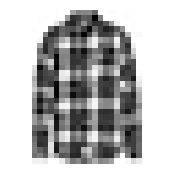

In [278]:
image_index = np.random.randint(len(X_test))
image = np.array([X_test[image_index]])
confidences = model.predict(image)
confidence = np.max(confidences[0])
prediction = np.argmax(confidences[0])
print("Prediction:", class_names[prediction])
print("Confidence:", confidence)

print("Truth:", class_names[y_test[image_index]])
plt.figure(figsize = (2,2))
plt.imshow(image[0], cmap="binary")
plt.axis('off')
plt.show()

In [279]:
model.save(filepath="fashion_clf.keras")

Regresja:

In [280]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X = housing['data']
y = housing['target']

X_trains, X_tests, y_trains, y_tests = train_test_split(X, y, test_size=0.2)

In [281]:
model_linear = keras.models.Sequential()

normal = model_linear.add(keras.layers.LayerNormalization())
dense_1 = model_linear.add(keras.layers.Dense(units=50, activation='relu'))
dense_2 = model_linear.add(keras.layers.Dense(units=50, activation='relu'))
dense_3 = model_linear.add(keras.layers.Dense(units=50, activation='relu'))
dense_output = model_linear.add(keras.layers.Dense(units=1, activation='linear'))

model_linear.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.RootMeanSquaredError()])

In [282]:
es = keras.callbacks.EarlyStopping(patience=5, min_delta=0.01, verbose=1)

root_logdir_lin = os.path.join(os.curdir, "housing_logs")

run_logdir_lin = get_run_logdir(root_logdir_lin)

tensorboard_cbs = keras.callbacks.TensorBoard(log_dir=run_logdir_lin)

In [283]:
model_linear.fit(x=X_trains, y=y_trains, epochs=10, callbacks=[es, tensorboard_cbs], validation_data=(X_tests, y_tests))

Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.7221 - root_mean_squared_error: 1.2974 - val_loss: 1.3241 - val_root_mean_squared_error: 1.1507
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3074 - root_mean_squared_error: 1.1433 - val_loss: 1.3268 - val_root_mean_squared_error: 1.1519
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3508 - root_mean_squared_error: 1.1620 - val_loss: 1.3155 - val_root_mean_squared_error: 1.1470
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3236 - root_mean_squared_error: 1.1504 - val_loss: 1.3322 - val_root_mean_squared_error: 1.1542
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3337 - root_mean_squared_error: 1.1548 - val_loss: 1.3241 - val_root_mean_squared_error: 1.1507
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3076 - root_mean_squared_error: 1.1434 - val_loss: 1.2970 - val_root_mean_squared_error: 1.1388
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step 

In [284]:
classes = housing.feature_names[0:6]

index = np.random.randint(len(X_tests))
instance = np.array([X_tests[index]])
prediction = model_linear.predict(instance).flatten()[0]

print("Prediction:", prediction)
print("Truth:", y_tests[index], "\n")

zipp = zip(classes, instance[0])
for name, value in zipp:
    print(f"{name}: {value}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Prediction: 1.2543802
Truth: 0.531 

MedInc: 1.3807
HouseAge: 27.0
AveRooms: 4.083333333333333
AveBedrms: 1.065217391304348
Population: 839.0
AveOccup: 3.039855072463768


In [285]:
model_linear.save(filepath="reg_housing_1.keras")

Inne modele:

In [286]:
model_linear_2 = keras.models.Sequential()

normal = model_linear_2.add(keras.layers.LayerNormalization())
dense_1 = model_linear_2.add(keras.layers.Dense(units=300, activation='relu'))
dense_2 = model_linear_2.add(keras.layers.Dense(units=300, activation='relu'))
dense_3 = model_linear_2.add(keras.layers.Dense(units=300, activation='relu'))
dense_4 = model_linear_2.add(keras.layers.Dense(units=300, activation='relu'))
dense_output = model_linear_2.add(keras.layers.Dense(units=1, activation='linear'))

model_linear_2.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.RootMeanSquaredError()])

model_linear_2.fit(x=X_trains, y=y_trains, epochs=10, callbacks=[es, tensorboard_cbs], validation_data=(X_tests, y_tests))

model_linear_2.save(filepath="reg_housing_2.keras")

Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.5326 - root_mean_squared_error: 1.2309 - val_loss: 1.3464 - val_root_mean_squared_error: 1.1603
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.3592 - root_mean_squared_error: 1.1657 - val_loss: 1.3262 - val_root_mean_squared_error: 1.1516
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.3269 - root_mean_squared_error: 1.1518 - val_loss: 1.2913 - val_root_mean_squared_error: 1.1363
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 1.2974 - root_mean_squared_error: 1.1389 - val_loss: 1.2182 - val_root_mean_squared_error: 1.1037
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 1.2437 - root_mean_squared_error: 1.1152 - val_loss: 1.0563 - val_root_mean_squared_error: 1.0277
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.0190 - root_mean_squared_error: 1.0093 - val_loss: 0.8923 - val_root_mean_squared_error: 0.9446
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step 

In [287]:
index = np.random.randint(len(X_tests))
instance = np.array([X_tests[index]])
prediction = model_linear_2.predict(instance).flatten()[0]

print("Prediction:", prediction)
print("Truth:", y_tests[index], "\n")

zipp = zip(classes, instance[0])
for name, value in zipp:
    print(f"{name}: {value}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
Prediction: 2.4932823
Truth: 1.695 

MedInc: 4.0391
HouseAge: 15.0
AveRooms: 6.297709923664122
AveBedrms: 0.9923664122137404
Population: 334.0
AveOccup: 2.549618320610687


In [288]:
model_linear_3 = keras.models.Sequential()

normal = model_linear_3.add(keras.layers.LayerNormalization())
dense_1 = model_linear_3.add(keras.layers.Dense(units=10, activation='relu'))
dense_2 = model_linear_3.add(keras.layers.Dense(units=10, activation='relu'))
dense_output = model_linear_3.add(keras.layers.Dense(units=1, activation='linear'))

model_linear_3.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.MeanSquaredError(), metrics=[keras.metrics.RootMeanSquaredError()])

model_linear_3.fit(x=X_trains, y=y_trains, epochs=10, callbacks=[es, tensorboard_cbs], validation_data=(X_tests, y_tests))

model_linear_3.save(filepath="reg_housing_3.keras")

Epoch 1/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2.3725 - root_mean_squared_error: 1.5103 - val_loss: 1.3262 - val_root_mean_squared_error: 1.1516
Epoch 2/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3330 - root_mean_squared_error: 1.1545 - val_loss: 1.3249 - val_root_mean_squared_error: 1.1510
Epoch 3/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3397 - root_mean_squared_error: 1.1574 - val_loss: 1.3181 - val_root_mean_squared_error: 1.1481
Epoch 4/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3549 - root_mean_squared_error: 1.1638 - val_loss: 1.3175 - val_root_mean_squared_error: 1.1478
Epoch 5/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.3314 - root_mean_squared_error: 1.1538 - val_loss: 1.3135 - val_root_mean_squared_error: 1.1461
Epoch 6/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3489 - root_mean_squared_error: 1.1613 - val_loss: 1.3129 - val_root_mean_squared_error: 1.1458
Epoch 7/10
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step 

In [289]:
index = np.random.randint(len(X_tests))
instance = np.array([X_tests[index]])
prediction = model_linear_3.predict(instance).flatten()[0]

print("Prediction:", prediction)
print("Truth:", y_tests[index], "\n")

zipp = zip(classes, instance[0])
for name, value in zipp:
    print(f"{name}: {value}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Prediction: 1.9674367
Truth: 2.621 

MedInc: 7.1736
HouseAge: 12.0
AveRooms: 6.289002557544757
AveBedrms: 0.9974424552429667
Population: 1054.0
AveOccup: 2.6956521739130435


In [290]:
%load_ext tensorboard
%tensorboard --logdir ./image_logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 28644), started 0:04:24 ago. (Use '!kill 28644' to kill it.)